## Установка библиотека

In [2]:
!pip install statsmodels >> None
!pip install prophet >> None
!pip install neuralprophet[live] >> None
!pip install numpy==1.24.1 >> None


In [21]:
import matplotlib.pyplot as plt  # plots
import numpy as np  # vectors and matrices
import pandas as pd  # tables and data manipulations
import seaborn as sns  # more plots
from prophet import Prophet
from neuralprophet import NeuralProphet, set_log_level

set_log_level("ERROR")

sns.set()

import warnings  
from itertools import product  # some useful functions

import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.formula.api as smf  # statistics and econometrics
import statsmodels.tsa.api as smt
from dateutil.relativedelta import \
    relativedelta  # working with dates with style
from scipy.optimize import minimize  # for function minimization
from tqdm.notebook import tqdm
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             mean_squared_log_error, median_absolute_error,
                             r2_score)

warnings.filterwarnings("ignore") # `do not disturbe` mode

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Предобработка, визуализацияя

In [54]:
df = pd.read_csv("t90.csv", delimiter=",", parse_dates=True).drop(
    columns=["item_id", "num", "value_min", "value_avg"])
df.rename(columns={"value_max": "value_max_90"}, inplace=True)

for current_df in ["t93.csv"]:
    current_df = pd.read_csv(current_df, delimiter=",", parse_dates=True).drop(
        columns=["item_id", "num", "value_min", "value_avg"])

    current_df.rename(columns={"value_max": "value_max_93"}, inplace=True)

    df = pd.merge(df, current_df, on='clock', how='inner')
df

,clock,value_max_90,value_max_93
0,1640779200,2.8600,62.5615
1,1640782800,0.7288,72.2527
2,1640786400,0.7412,92.3417
3,1640790000,0.2900,94.0201
4,1640793600,0.3262,93.3966
...,...,...,...
8754,1672293600,2.7200,55.3245
8755,1672297200,2.0438,60.8267
8756,1672300800,2.4925,48.9640
8757,1672304400,1.2325,66.5998


In [56]:
df["clock"] = df["clock"].map(lambda x: pd.Timestamp(x, unit='s'))
# df.set_index("clock", inplace=True)
# df = df.drop(columns=["itemid", "num", "value_min", "value_avg"])
# df.drop(['Series'], axis=1, inplace=True)
# df.Time = df.Time.map(lambda a: a[:a.find('+')])
df

,clock,value_max_90,value_max_93
0,2021-12-29 12:00:00,2.8600,62.5615
1,2021-12-29 13:00:00,0.7288,72.2527
2,2021-12-29 14:00:00,0.7412,92.3417
3,2021-12-29 15:00:00,0.2900,94.0201
4,2021-12-29 16:00:00,0.3262,93.3966
...,...,...,...
8754,2022-12-29 06:00:00,2.7200,55.3245
8755,2022-12-29 07:00:00,2.0438,60.8267
8756,2022-12-29 08:00:00,2.4925,48.9640
8757,2022-12-29 09:00:00,1.2325,66.5998


In [57]:
df.to_csv("history_one_metric_cleared.csv")

In [58]:
df.rename(columns={"clock": "ds", "value_max_90": "y"}, inplace=True)

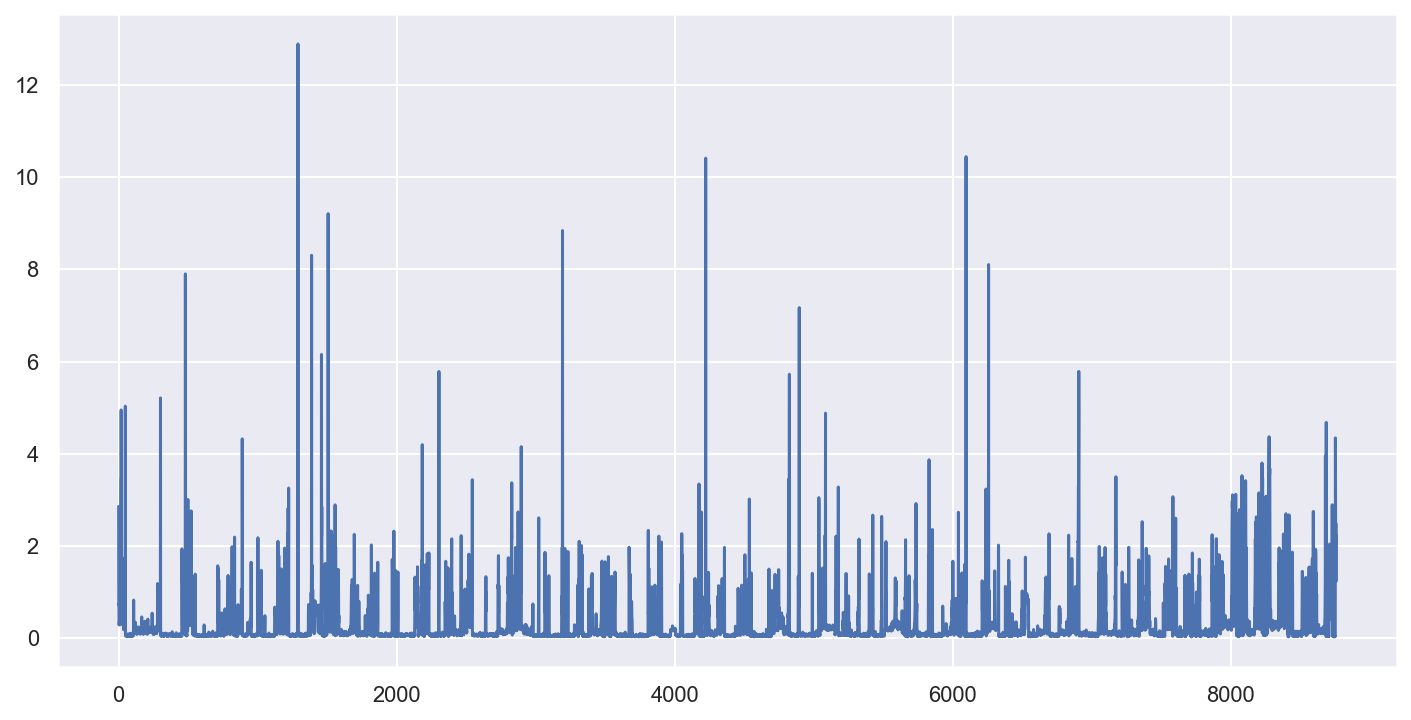

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(df.y)
plt.show()

09:58:09 - cmdstanpy - INFO - Chain [1] start processing
09:58:11 - cmdstanpy - INFO - Chain [1] done processing


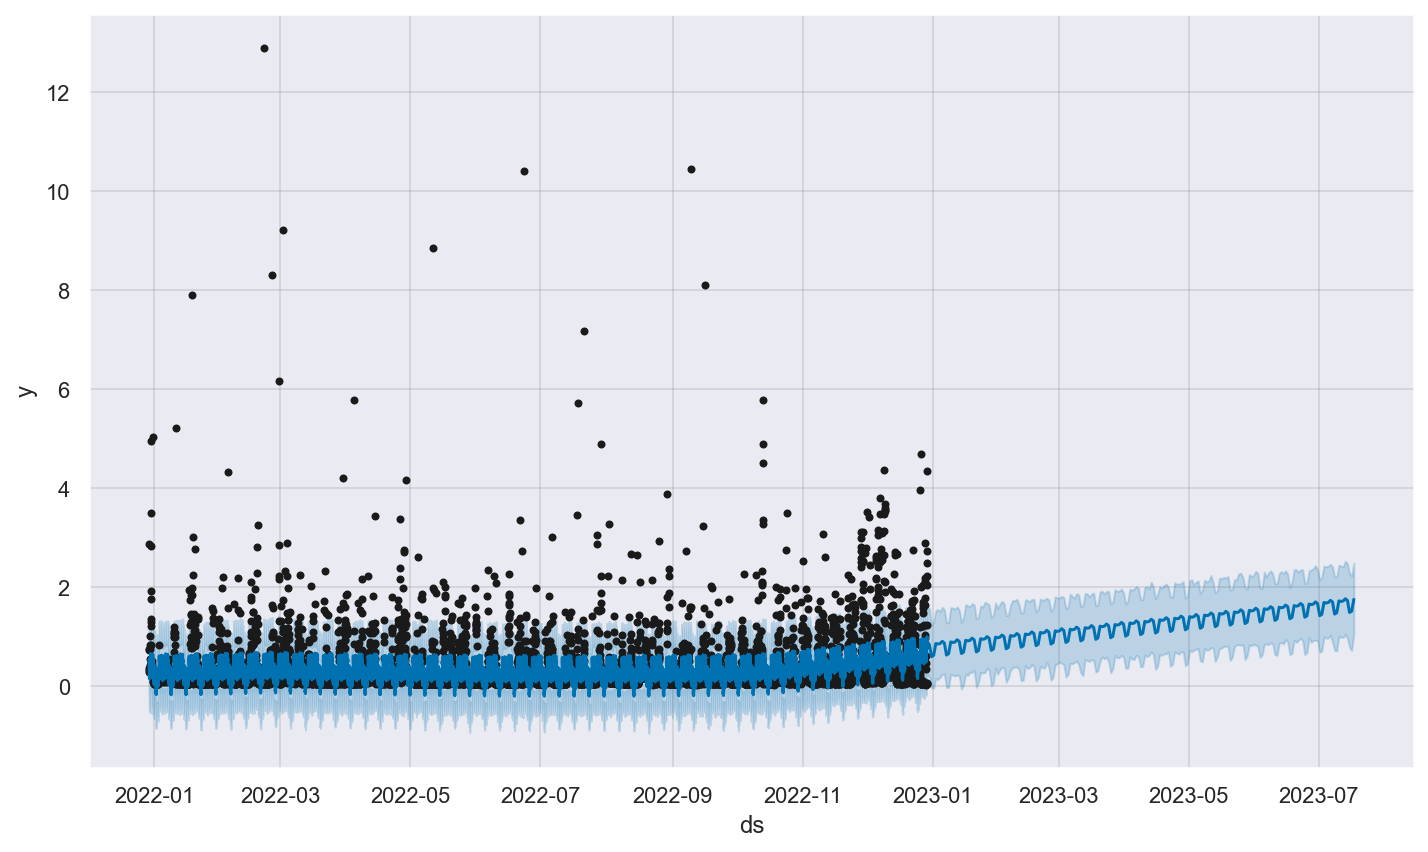

In [60]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=200)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)

In [6]:
m = NeuralProphet(growth="off", weekly_seasonality=False, daily_seasonality=8, learning_rate=0.1)
# metrics = m.fit(df, freq='T')

In [7]:
# df_future = m.make_future_dataframe(df, periods=3600)
# forecast = m.predict(df_future)
# fig_forecast = m.plot(forecast)
# fig_components = m.plot_components(forecast)
# fig_model = m.plot_parameters()

In [9]:
df_train, df_test = m.split_df(df, freq="T", valid_p=0.10)

metrics = m.fit(df_train, freq="T", validation_df=df_test)


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 284it [00:00, ?it/s]

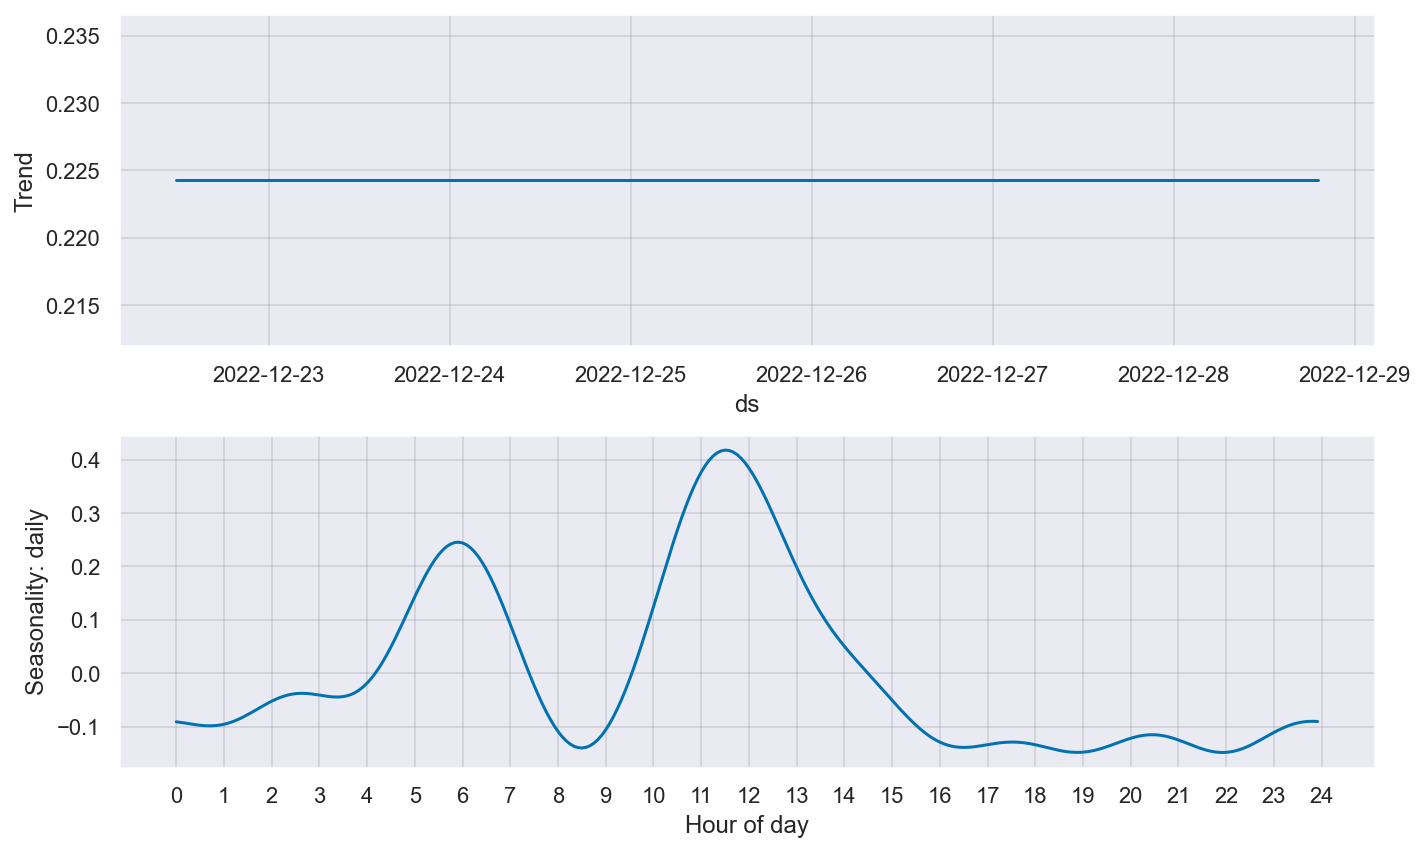

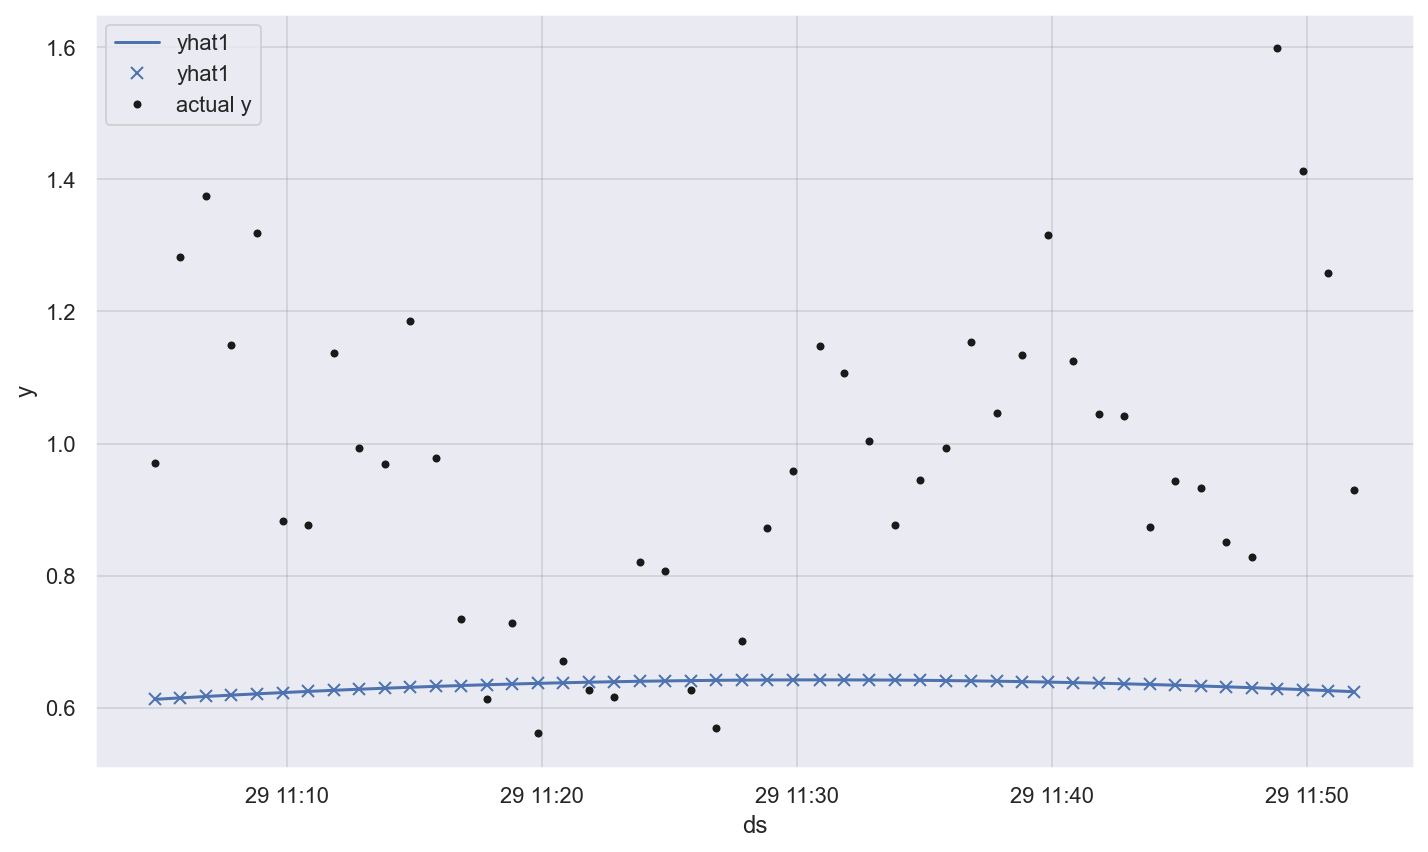

In [12]:
forecast = m.predict(df_test)
fig_param = m.plot_parameters()
fig_prediction = m.plot(forecast[-48:])

In [ ]:
forecast = m.predict(sf_pv_df)
fig = m.plot(forecast)


In [ ]:
plt.figure(figsize=(12, 6))
forecast.set_index("ds", inplace=True)
plt.plot(forecast.trend)
plt.show()

In [49]:
def plotMovingAverage(
    series, window, plot_intervals=False, scale=1.96, plot_anomalies=False
):

    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15, 5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bond] = series[series < lower_bond]
            anomalies[series > upper_bond] = series[series > upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    # plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

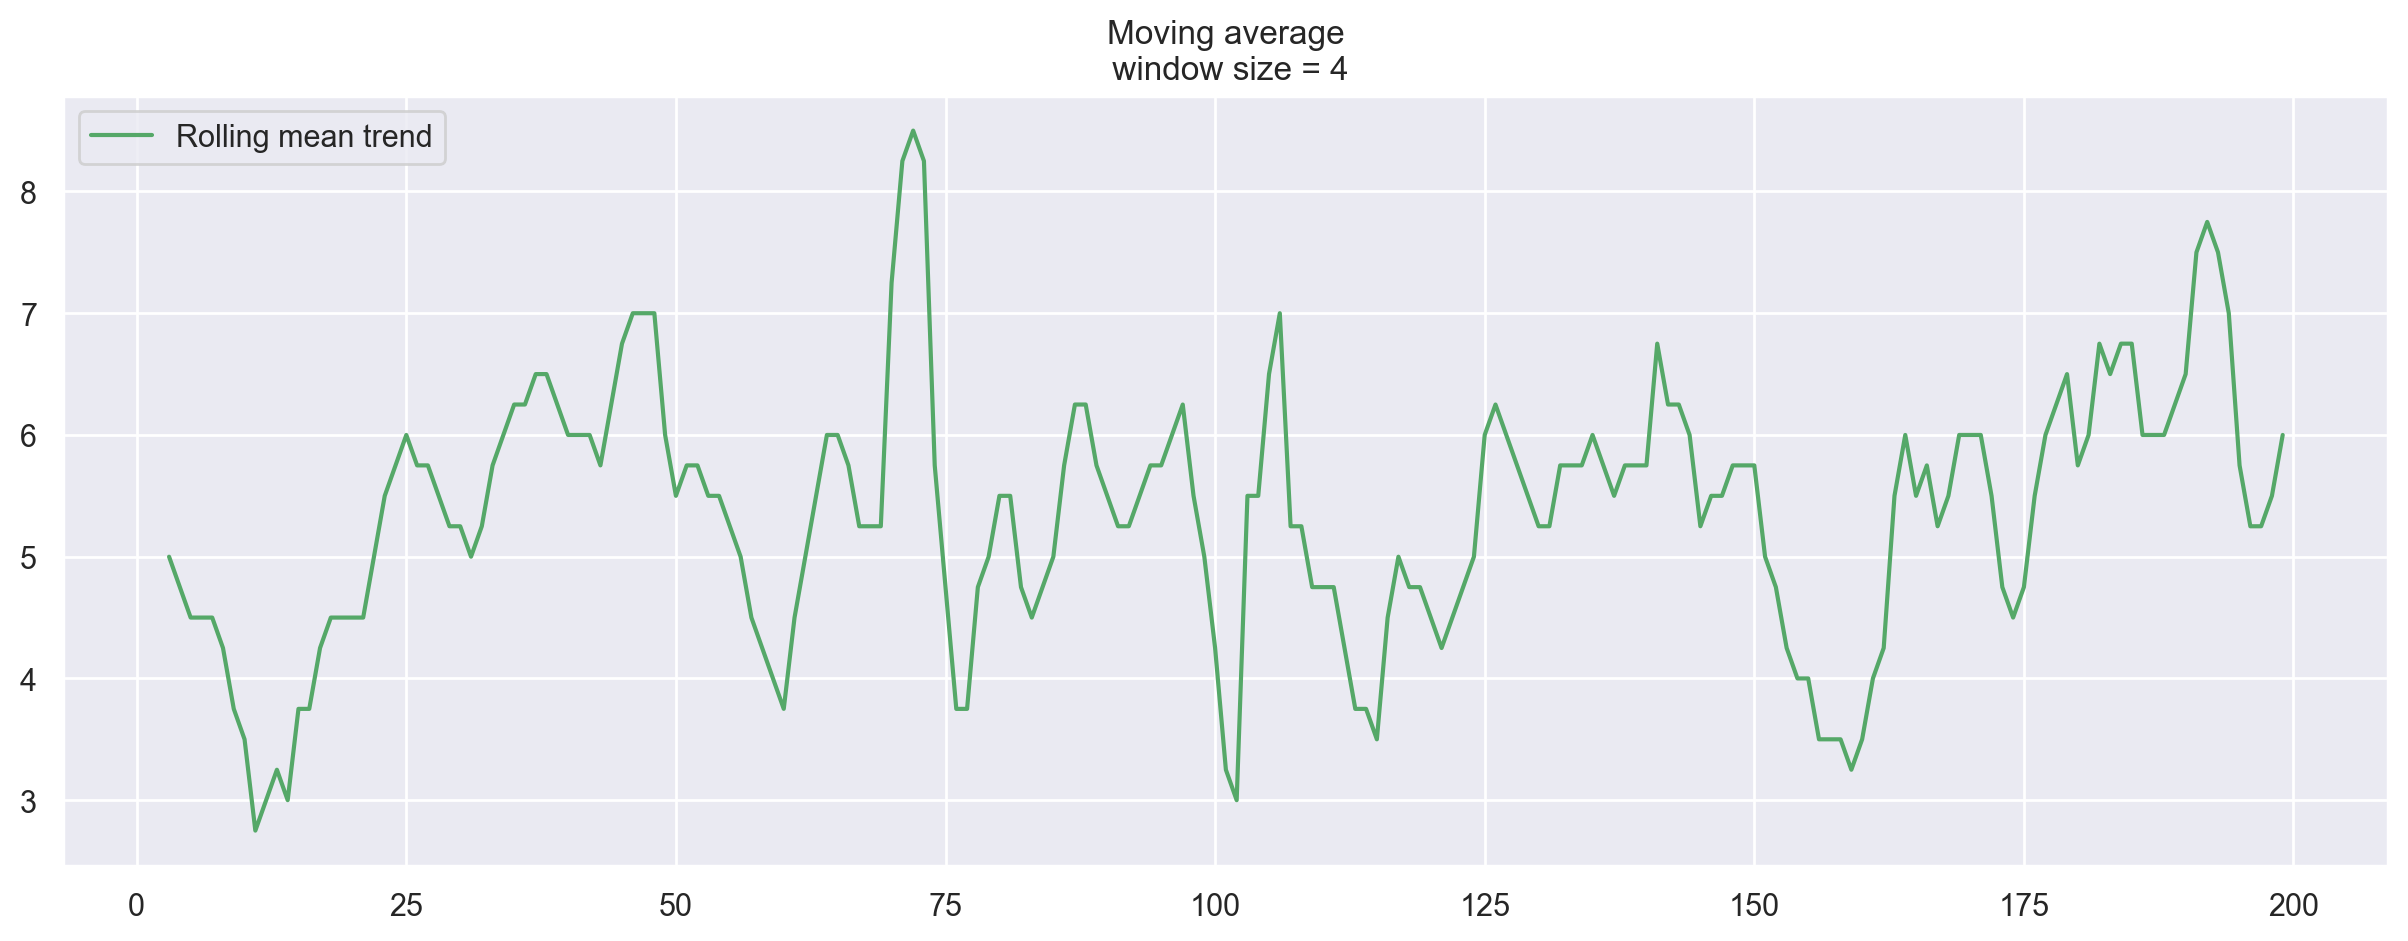

In [8]:
plotMovingAverage(df.Value, 4)

In [62]:
df1 = df
df1.set_index('ds', inplace=True)

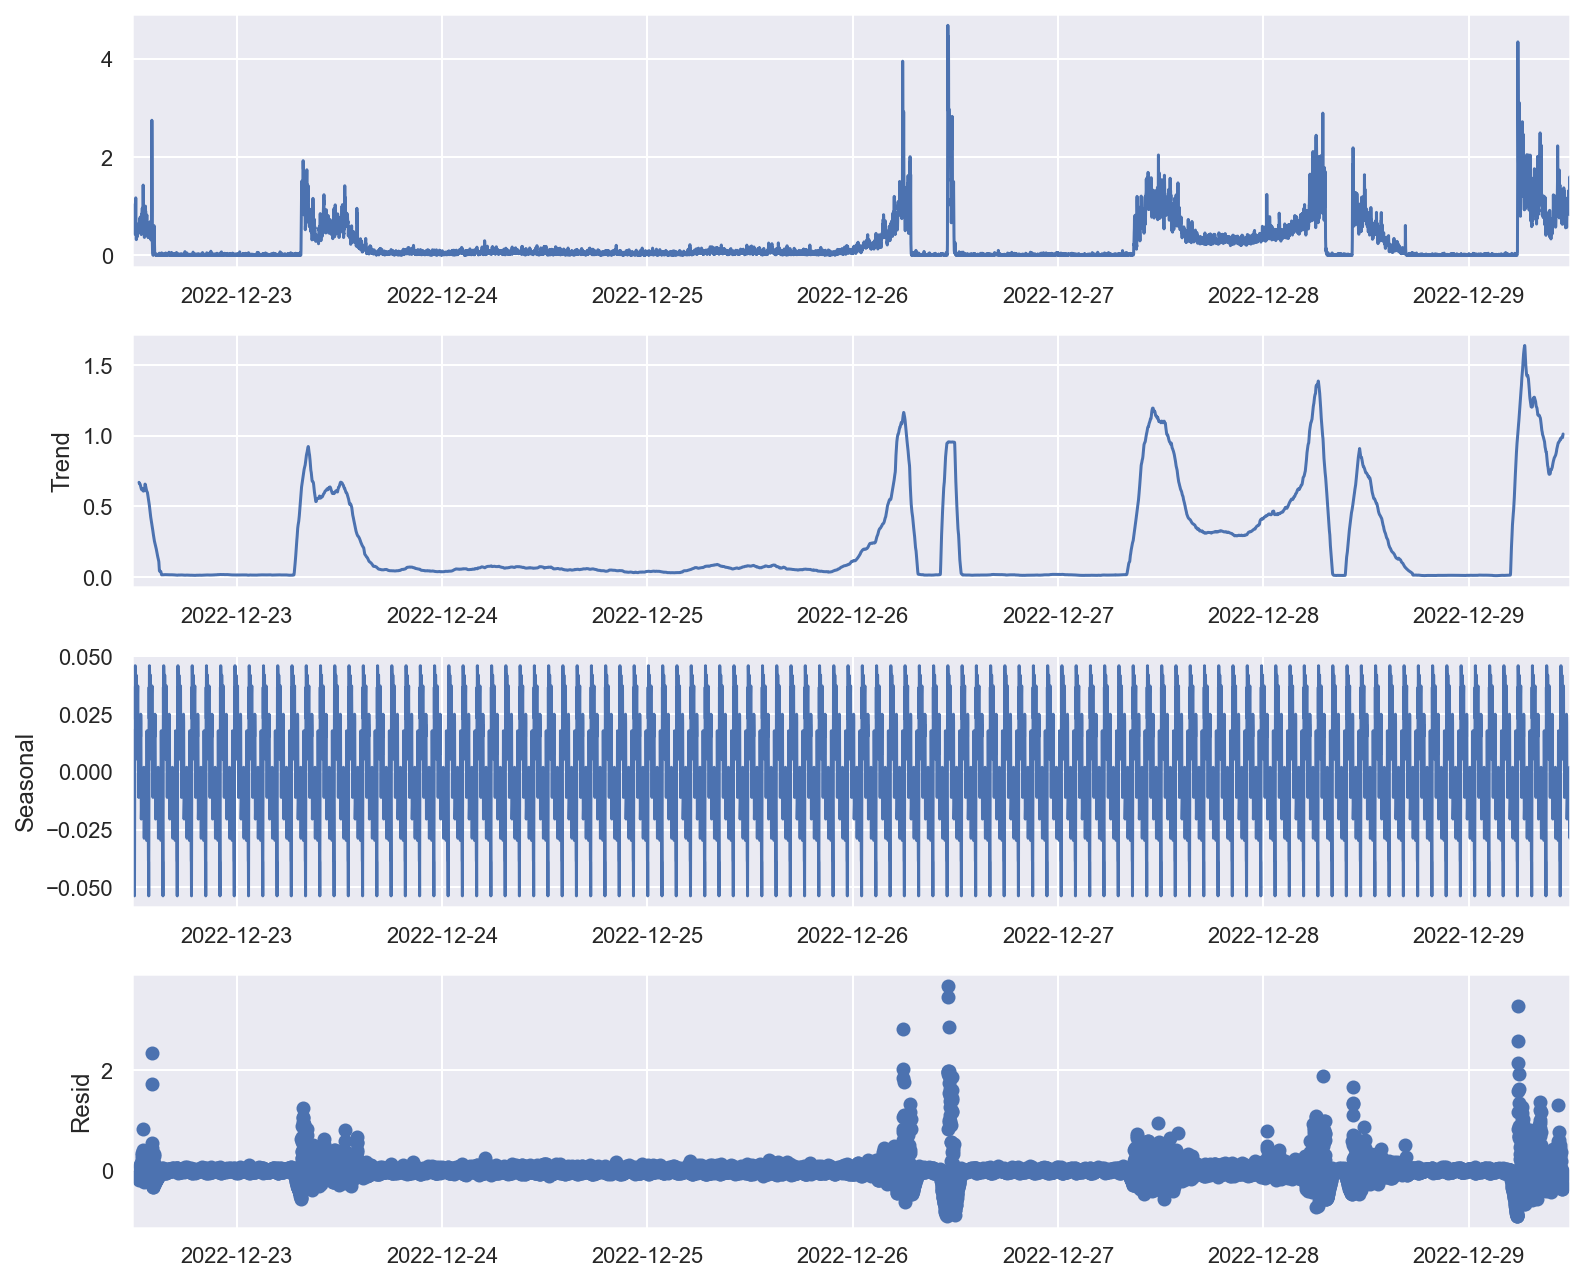

In [63]:
# импортируем функцию seasonal_decompose из statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
 
# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
 
# применяем функцию к данным о перевозках
decompose = seasonal_decompose(x=df1, period=100)
decompose.plot()
 
plt.show()

In [35]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

In [ ]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()